# Pandas

Pandas se basa en Numpy, pero es una librería diferente que nos permite analizar información de una forma mucho más sencilla

Para aprender el manejo de Pandas, utilizaremos un dataset (conjunto de datos) que contiene la información de las bebidas que se toman en todo el mundo en 2010

* Artículo en **FiveThirtyEight**: [Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)
* Dataset: [DataWorld](https://data.world/fivethirtyeight/alcohol-consumption#) (Es necesario registrarse, se puede con una cuenta de Google)

Así como Numpy suele llamársele np, a Pandas suele llamársele pd

In [2]:
import numpy as np
import pandas as pd

In [3]:
bebidas = pd.read_csv('datasets\\06-drinks.csv')

In [4]:
# Esto funciona con colab de google
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
bebidas

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


# Matplotlib

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

El gráfico más sencillo que ofrece pyplot es un gráfico de barras, donde el primer parámetro es el eje de las X y el segundo corresponde al eje de las y

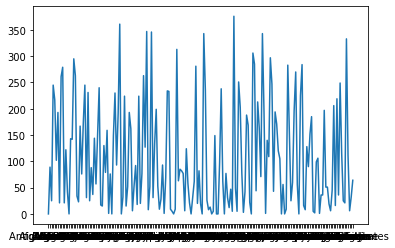

In [6]:
plt.plot(bebidas.country, bebidas.beer_servings)

La parte inferior está muy llena por los nombres de todos los países. Tomaremos ahora los datos de los países que definimos como Europeos, para disminuir la densidad de información y hacer un gráfico más claro

Para esto, vamos a crear una columna que indique el continente al que pertenece un país, usaremos el mismo código que la vez anterior

In [7]:
bebidas.loc[bebidas.country.isin(['Portugal', 'Spain', 'France', 'Germnay', 'Poland',
                                  'United Kingdom', 'Italy', 'Netherlands', 'Belgium', 
                                  'Czech Republic', 'Greece', 'Sweden', 'Hungary',
                                  'Switzerland', 'Austria', 'Serbia', 'Bulgaria', 'Denmark',
                                  'Finland', 'Norway', 'Ireland', 'Croatia', 'Moldova',
                                  'Bosnia-Herzegovina', 'Montenegro', 'Luxemburg', 
                                  'Malta', 'Andorra', 'Monaco', 'Liechenstein', 
                                  'Macedonia', 'San Marino']), 
            'continente'] = "Europa"

La vez anterior habíamos creado la columna con:

    bebidas['continente'] = 'Otro'
    
para inicializar todos los países como pertenecientes a `Otro` continente. Esta vez no lo hicimos así, por lo que en la columna "Europa", habrá países que **no** tienen continente, de hecho, no tienen ningún dato, y se identificarán como...

In [8]:
bebidas.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continente
0,Afghanistan,0,0,0,0.0,NaN
1,Albania,89,132,54,4.9,NaN
2,Algeria,25,0,14,0.7,NaN
3,Andorra,245,138,312,12.4,Europa
4,Angola,217,57,45,5.9,NaN


Ahora crearemos un nuevo dataframe que tiene únicamente los países que se encuentran en Europa

In [9]:
europa = bebidas[bebidas.continente == 'Europa']
europa

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continente
3,Andorra,245,138,312,12.4,Europa
9,Austria,279,75,191,9.7,Europa
16,Belgium,295,84,212,10.5,Europa
21,Bosnia-Herzegovina,76,173,8,4.6,Europa
25,Bulgaria,231,252,94,10.3,Europa
42,Croatia,230,87,254,10.2,Europa
45,Czech Republic,361,170,134,11.8,Europa
48,Denmark,224,81,278,10.4,Europa
60,Finland,263,133,97,10.0,Europa
61,France,127,151,370,11.8,Europa


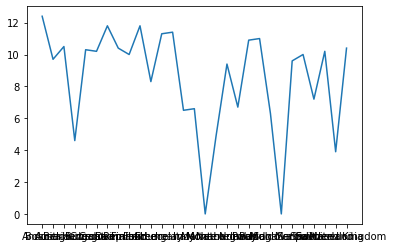

In [10]:
plt.plot(europa.country, europa.total_litres_of_pure_alcohol)

Podemos mejorar la gráfica añadiendo información a los ejes, y modificando cómo se presentan los nombres de los países

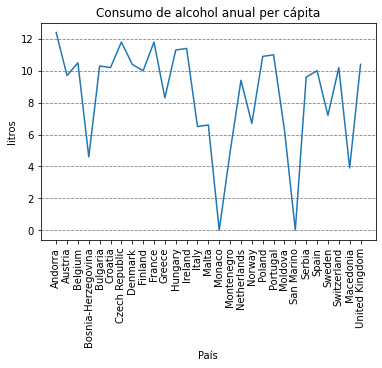

In [11]:
# Título principal, de ejes X y Y
plt.title('Consumo de alcohol anual per cápita')
plt.xlabel('País')
plt.ylabel('litros')

# Rotación de las marcas de valores en el eje X
plt.xticks(rotation=90)

# Marcas de intervalo en el eje de las Y, para facilitar la lectura
plt.grid(axis='y', c='gray', ls='--')

plt.plot(europa.country, europa.total_litres_of_pure_alcohol)

Para hacer más fácil la lectura de la gráfica, podemos ordenar el dataframe de mayor a menor

In [12]:
europa = europa.sort_values(by="total_litres_of_pure_alcohol", ascending=False)

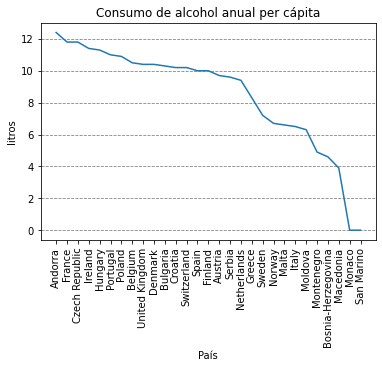

In [13]:
plt.title('Consumo de alcohol anual per cápita')
plt.xlabel('País')
plt.ylabel('litros')
plt.xticks(rotation=90)
plt.grid(axis='y', c='gray', ls='--')

plt.plot(europa.country, europa.total_litres_of_pure_alcohol)

En un espacio para gráficas, podemos añadir más de una serie, simplemente indicando que las dibuje.

Matplotlib asigna los colores de cada serie de forma automática

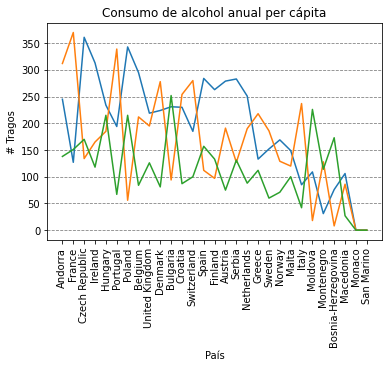

In [14]:
plt.title('Consumo de alcohol anual per cápita')
plt.xlabel('País')
plt.ylabel('# Tragos')
plt.xticks(rotation=90)
plt.grid(axis='y', c='gray', ls='--')

plt.plot(europa.country, europa.beer_servings)
plt.plot(europa.country, europa.wine_servings)
plt.plot(europa.country, europa.spirit_servings)

En la gráfica anterior, no sabemos qué serie corresponde a qué cosa, por lo que podemos añadir la opción de etiquetas (label) a cada serie y pedir que se añada una leyenda

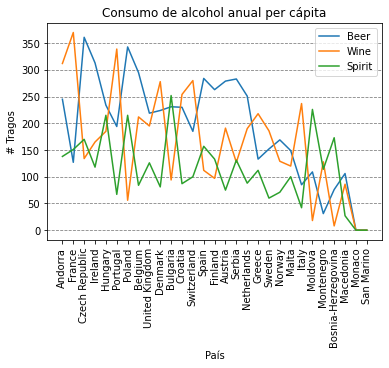

In [15]:
plt.title('Consumo de alcohol anual per cápita')
plt.xlabel('País')
plt.ylabel('# Tragos')
plt.xticks(rotation=90)
plt.grid(axis='y', c='gray', ls='--')

plt.plot(europa.country, europa.beer_servings, label='Beer')
plt.plot(europa.country, europa.wine_servings, label='Wine')
plt.plot(europa.country, europa.spirit_servings, label='Spirit')

plt.legend(loc='best')

Gráficos de barras (no apiladas)

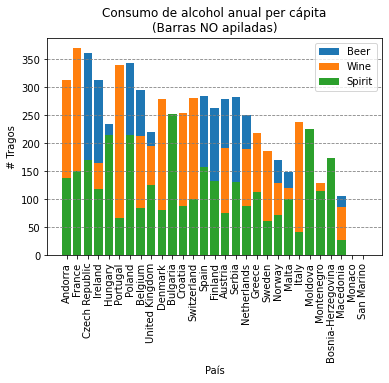

In [16]:
plt.title('Consumo de alcohol anual per cápita\n(Barras NO apiladas)')
plt.xlabel('País')
plt.ylabel('# Tragos')
plt.xticks(rotation=90)
plt.grid(axis='y', c='gray', ls='--')

plt.bar(europa.country, europa.beer_servings, label='Beer')
plt.bar(europa.country, europa.wine_servings, label='Wine')
plt.bar(europa.country, europa.spirit_servings, label='Spirit')

plt.legend(loc='best')

👆🏻 Esto no es una gráfica apilada. En los primeros dos casos, no podemos ver "beer" porque las dos gráficas subsecuentes se pintaron por encima. Esto es una gráfica de barras donde todas están una encima de otra, en el mismo eje. Es decir, el valor del vino (el más alto para los dos primeros), está tapando la cerveza

En un espacio gráfico, podemos añadir otra serie más, de un dato diferente, como una línea que indica cuál es el total de litros tomados por cada adulto, de forma anual

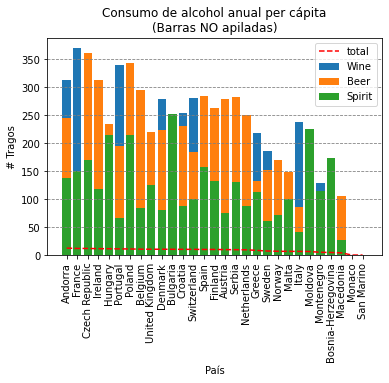

In [17]:
plt.xlabel('País')
plt.ylabel('# Tragos')
plt.xticks(rotation=90)
plt.grid(axis='y', c='gray', ls='--')
plt.title('Consumo de alcohol anual per cápita\n(Barras NO apiladas)')

plt.bar(europa.country, europa.wine_servings, label='Wine')
plt.bar(europa.country, europa.beer_servings, label='Beer')
plt.bar(europa.country, europa.spirit_servings, label='Spirit')

plt.plot(europa.country, europa.total_litres_of_pure_alcohol, c='r', label='total', ls='--')

plt.legend(loc='best')

Como la escala en la que se pintan el consumo de litros por persona al año es muy diferente al número de tragos, podemos hacer que el eje secundario (derecho) tome esta escala

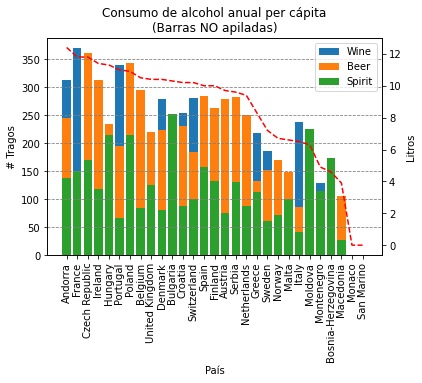

In [18]:
fig, ax1 = plt.subplots()

plt.xticks(rotation=90)
plt.title('Consumo de alcohol anual per cápita\n(Barras NO apiladas)')

ax1.set_xlabel('País')
ax1.set_ylabel('# Tragos')
ax1.grid(axis='y', c='gray', ls='--')

ax1.bar(europa.country, europa.wine_servings, label='Wine')
ax1.bar(europa.country, europa.beer_servings, label='Beer')
ax1.bar(europa.country, europa.spirit_servings, label='Spirit')

ax2 = ax1.twinx()
ax2.plot(europa.country, europa.total_litres_of_pure_alcohol, c='r', label='total', ls='--')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel('Litros')

ax1.legend(loc='best')

Sin embargo, nuestras barras apiladas, siguen estando mal. Para hacer unas barras apiladas en forma con matplotlib, hay que graficar las barras que queremos encima de las otras. Los valores de las otras se pasan como un arreglo de Numpy, se entenderá mejor con el siguiente ejemplo:

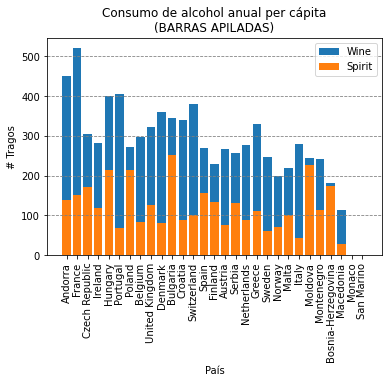

In [19]:
plt.xlabel('País')
plt.ylabel('# Tragos')
plt.xticks(rotation=90)
plt.grid(axis='y', c='gray', ls='--')
plt.title('Consumo de alcohol anual per cápita\n(BARRAS APILADAS)')

plt.bar(europa.country, europa.wine_servings, label='Wine', bottom=np.array(europa.spirit_servings))
plt.bar(europa.country, europa.spirit_servings, label='Spirit')

plt.legend(loc='best')

Entonces, completando nuestro ejemplo, tenemos...

Text(0, 0.5, 'Litros')

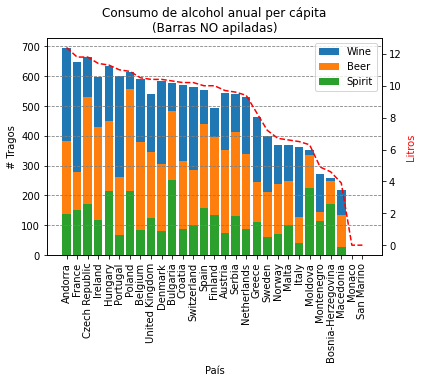

In [20]:
plt.title('Consumo de alcohol anual per cápita\n(Barras NO apiladas)')
plt.xlabel('País')
plt.ylabel('# Tragos')
plt.xticks(rotation=90)
plt.grid(axis='y', c='gray', ls='--')

plt.bar(europa.country, europa.wine_servings, label='Wine', 
        bottom=np.array(europa.beer_servings) + np.array(europa.spirit_servings))
plt.bar(europa.country, europa.beer_servings, label='Beer', 
        bottom=np.array(europa.spirit_servings))
plt.bar(europa.country, europa.spirit_servings, label='Spirit')
plt.legend(loc='best')

plt.twinx()

plt.plot(europa.country, europa.total_litres_of_pure_alcohol, c='r', label='total', ls='--')
plt.ylabel('Litros', c='r')



### ¿En dónde se sirven los mejores tragos?

Viendo esta gráfica observamos que la línea roja (litros por persona al año) está claramente correlacionada con el número de tragos que se sirven, sin embargo, en algunos países como **Andorra** la línea está ligeramente por debajo del número de tragos, y en países como **Finlandia** está significativamente por arriba.

¿Qué nos dice eso?

¿dónde sirven los mejores tragos en Europa? Supondríamos que será en donde te den más bebida por trago, así que podemos sacar el promedio de ml por trago:

In [21]:
europa['promedio_por_trago'] = (europa.total_litres_of_pure_alcohol * 1000) / (europa.beer_servings 
                                                                               + europa.spirit_servings
                                                                               + europa.wine_servings)

In [22]:
europa[:5]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continente,promedio_por_trago
3,Andorra,245,138,312,12.4,Europa,17.841727
61,France,127,151,370,11.8,Europa,18.209877
45,Czech Republic,361,170,134,11.8,Europa,17.744361
81,Ireland,313,118,165,11.4,Europa,19.127517
75,Hungary,234,215,185,11.3,Europa,17.823344


In [23]:
europa = europa.sort_values(by='promedio_por_trago', ascending=False)

In [24]:
europa.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continente,promedio_por_trago
60,Finland,263,133,97,10.0,Europa,20.283976
182,United Kingdom,219,126,195,10.4,Europa,19.259259
81,Ireland,313,118,165,11.4,Europa,19.127517
136,Portugal,194,67,339,11.0,Europa,18.333333
61,France,127,151,370,11.8,Europa,18.209877


In [25]:
europa.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continente,promedio_por_trago
135,Poland,343,215,56,10.9,Europa,17.752443
151,Serbia,283,131,127,9.6,Europa,17.744917
45,Czech Republic,361,170,134,11.8,Europa,17.744361
111,Monaco,0,0,0,0.0,Europa,NaN
147,San Marino,0,0,0,0.0,Europa,NaN


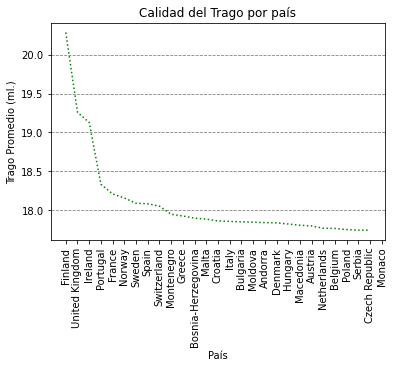

In [26]:
plt.title('Calidad del Trago por país')
plt.xlabel('País')
plt.ylabel('Trago Promedio (ml.)')
plt.xticks(rotation=90)
plt.grid(axis='y', c='gray', ls='--')

# Recordemos por qué es importante iniciar el eje Y en cero
# plt.ylim(0, 21)

plt.plot(europa.country, europa.promedio_por_trago, c='green', ls=':')
